In [17]:
%load_ext autoreload
%autoreload 2
import numpy as np
import networkx as nx
import logging, sys
import cstrees.scoring as sc
import cstrees.cstree as ct
import matplotlib.pyplot as plt
#logging.basicConfig(stream=sys.stderr, level=logging.DEBUG)
logging.basicConfig(stream=sys.stderr, level=logging.ERROR)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


DEBUG:root:getting csirels per level
DEBUG:root:{0: [<cstrees.cstree.Stage object at 0x7f8eda6ae040>, <cstrees.cstree.Stage object at 0x7f8eddf37310>], 1: [<cstrees.cstree.Stage object at 0x7f8edf24c5e0>, <cstrees.cstree.Stage object at 0x7f8edf330220>], 2: [], -1: [<cstrees.cstree.Stage object at 0x7f8edf245280>]}
DEBUG:root:rels
DEBUG:root:{0: [<cstrees.cstree.CSI_relation object at 0x7f8edd163760>, <cstrees.cstree.CSI_relation object at 0x7f8eda69aac0>], 1: [<cstrees.cstree.CSI_relation object at 0x7f8eda69a580>, <cstrees.cstree.CSI_relation object at 0x7f8eda69a970>], 2: [], -1: [<cstrees.cstree.CSI_relation object at 0x7f8eda69ae80>]}
DEBUG:root: ⊥  X1, X0=0
DEBUG:root: ⊥  X1, X0=1
DEBUG:root:X0 ⊥  X2, X1=0
DEBUG:root:X0 ⊥  X2, X1=1
DEBUG:root: ⊥  X0
DEBUG:root:###### paired_csis
DEBUG:root:[{}, {(0, 2): [[None, {0}, None], [None, {1}, None]]}, {}, {}]
DEBUG:root:
 ######### minl cslisist
DEBUG:root:
#### Level 0
DEBUG:root:
#### Level 1
DEBUG:root:
#### Iteration 1
DEBUG:root:lev

      a  b  c
0     2  2  2
1     1  1  1
2     0  0  1
3     1  1  0
4     0  1  0
...  .. .. ..
1996  1  1  0
1997  0  1  1
1998  1  1  1
1999  1  1  0
2000  1  1  0

[2001 rows x 3 columns]
The used indices/levels I guess...
[0, 1, 2]


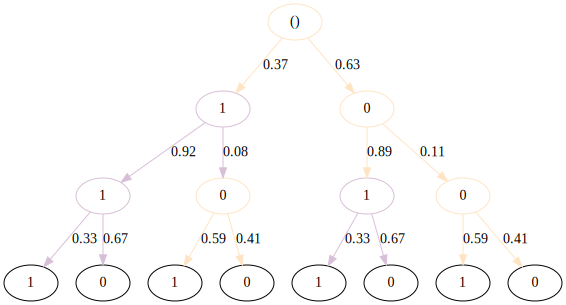

In [27]:
np.random.seed(5)
p = 3
cards = [2] * p
tree = ct.CStree(cards)
tree.labels = ["a", "b", "c"]

# V-structure
#tree.set_stages({
#    -1: [ct.Stage([])],
 #   0: [ct.Stage([{0, 1}])],
 #   1: [ct.Stage([0,0]), ct.Stage([0,1]), ct.Stage([1,0]), ct.Stage([1,1])]})

# Fork
tree.update_stages({
    0: [ct.Stage([0]),ct.Stage([1])],
    1: [ct.Stage([{0,1},0]), ct.Stage([{0,1},1])]})


tree.set_random_stage_parameters()
tree.create_tree()
tree.set_random_parameters()
a = tree.plot()

# a.draw("testplot.png")
x = tree.sample(2000)
print(x)
a

true_cdags = tree.to_minimal_context_graphs()
for key, val in true_cdags.items():
    agraph = nx.nx_agraph.to_agraph(val)
    agraph.layout("dot")
    agraph.draw("testing/"+str(key) + "_true.png",
                args='-Glabel="'+str(key)+'"   ')
a


In [26]:
order = [0, 1, 2]
order = ["a", "b", "c"]
# Should order be expressed as the labels or as the levels?
# labels seems more natural but may include strings then which is a bit ugly.
s1 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s1)

KeyError: "['a'] not in index"

In [14]:
#order = [0, 2, 1]
order = ["a", "c", "b"]
s2 = sc.score_order(order, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print(s2)

-3268.9944009209453


order: [0, 1, 2], score: -3266.7673757353805
order: [0, 2, 1], score: -3268.9944009209453
order: [1, 0, 2], score: -3266.7673757353796
order: [1, 2, 0], score: -3266.7673757353796
order: [2, 0, 1], score: -3268.9944009209453
order: [2, 1, 0], score: -3266.7673757353805
optimal order: [1, 0, 2], score -3266.7673757353796
max staging: ['[]']
max staging: ['[0]', '[1]']
max staging: ['[0, {0, 1}]', '[1, {0, 1}]']
stages :{0: [<cstrees.cstree.Stage object at 0x7f8ed9a7cee0>, <cstrees.cstree.Stage object at 0x7f8edce55dc0>], 1: [<cstrees.cstree.Stage object at 0x7f8edd047970>, <cstrees.cstree.Stage object at 0x7f8edce556a0>], 2: [], -1: [<cstrees.cstree.Stage object at 0x7f8eda68d880>]}
Level 0
[1] {1: 673, 0: 1117}
[0] {0: 156, 1: 54}
Level 1
[1, {0, 1}] {1: 579, 0: 1211}
[0, {0, 1}] {1: 119, 0: 91}
Level 2
Level -1
[] {1: 1790, 0: 210}


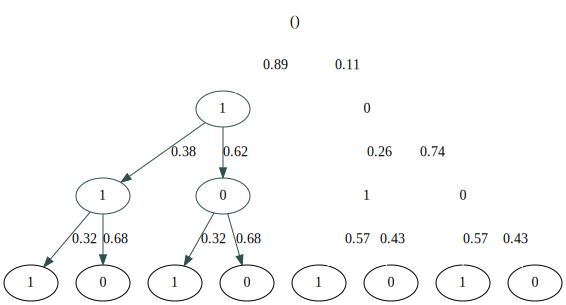

In [9]:
optord, score = ct.find_optimal_order(x, strategy="max", max_cvars=1, alpha_tot=1.0, method="BDeu")
print("optimal order: {}, score {}".format(optord, score))

opttree = ct.optimal_cstree(optord, x, max_cvars=1, alpha_tot=1.0, method="BDeu")
print("stages :{}".format(opttree.stages))
opttree.estimate_stage_parameters(x, alpha_tot=1.0, method="BDeu")
opttree.create_tree()
opttree.set_random_parameters()
opttree.plot()